In [ ]:
# Import Module
import pandas as pd
import numpy as np
from pylab import *
import matplotlib.pyplot as plt # for plotting
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import  MinMaxScaler
# permutation testing
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE


In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')

## EDA

In [ ]:
df.head()

,ID,TR_1_EventInd,TR_2_EventInd,TR_3_EventInd,feature_10_A,feature_10_B,feature_10_F,feature_10_G,feature_1_A,feature_1_B,...,feature_9_F,feature_9_G,feature_X_A,feature_X_B,feature_X_C,feature_X_D,index_1,index_2,index_3,Target
0,1,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,1,0.049,1.542456,-0.274727,0.0,0.0,1.0,0
1,2,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,1,0.015,1.287473,-1.140626,NaN,NaN,NaN,0
2,3,NaN,NaN,NaN,0.0,0.023,0.0,0.0,1.0,0.004,...,0.0,1.0,1,0.006,0.251501,-1.221567,NaN,NaN,NaN,0
3,4,NaN,NaN,NaN,1.0,0.019,0.0,2.0,0.0,0.005,...,0.0,0.0,1,0.039,1.673783,0.527796,NaN,NaN,NaN,1
4,5,NaN,NaN,1.0,1.0,0.023,0.0,2.0,1.0,0.014,...,1.0,2.0,0,0.037,0.263406,-0.301984,NaN,NaN,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             2660 non-null   int64  
 1   TR_1_EventInd  73 non-null     float64
 2   TR_2_EventInd  61 non-null     float64
 3   TR_3_EventInd  97 non-null     float64
 4   feature_10_A   2212 non-null   float64
 5   feature_10_B   1843 non-null   float64
 6   feature_10_F   2212 non-null   float64
 7   feature_10_G   2212 non-null   float64
 8   feature_1_A    1844 non-null   float64
 9   feature_1_B    1844 non-null   float64
 10  feature_1_C    1840 non-null   float64
 11  feature_1_D    1840 non-null   float64
 12  feature_1_E    1742 non-null   float64
 13  feature_1_F    1844 non-null   float64
 14  feature_1_G    1844 non-null   float64
 15  feature_2_A    1844 non-null   float64
 16  feature_2_B    1844 non-null   float64
 17  feature_2_C    1840 non-null   float64
 18  feature_

In [ ]:
# Data Shape
df.shape

# We have 2660 rows and 78 columns including target variable and ID

(2660, 78)

In [ ]:
df.isna().sum().sum() # We have a total of 69101 missing values which needs preprocessing

69101

In [ ]:
column_todrop = []
for column in df.columns:
    non_null_count = df[column].notnull().sum()  # Count non-null values in the column

    # Check if the number of non-null values is less than 200
    if non_null_count < 200:
        print("Column '{}' has less than 200 non-null values.".format(column))
        column_todrop.append(column)
print(column_todrop)

Column 'TR_1_EventInd' has less than 200 non-null values.
Column 'TR_2_EventInd' has less than 200 non-null values.
Column 'TR_3_EventInd' has less than 200 non-null values.
Column 'index_1' has less than 200 non-null values.
Column 'index_2' has less than 200 non-null values.
Column 'index_3' has less than 200 non-null values.
['TR_1_EventInd', 'TR_2_EventInd', 'TR_3_EventInd', 'index_1', 'index_2', 'index_3']


In [ ]:
df1 = df.drop(columns=column_todrop)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 72 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2660 non-null   int64  
 1   feature_10_A  2212 non-null   float64
 2   feature_10_B  1843 non-null   float64
 3   feature_10_F  2212 non-null   float64
 4   feature_10_G  2212 non-null   float64
 5   feature_1_A   1844 non-null   float64
 6   feature_1_B   1844 non-null   float64
 7   feature_1_C   1840 non-null   float64
 8   feature_1_D   1840 non-null   float64
 9   feature_1_E   1742 non-null   float64
 10  feature_1_F   1844 non-null   float64
 11  feature_1_G   1844 non-null   float64
 12  feature_2_A   1844 non-null   float64
 13  feature_2_B   1844 non-null   float64
 14  feature_2_C   1840 non-null   float64
 15  feature_2_D   1840 non-null   float64
 16  feature_2_E   1742 non-null   float64
 17  feature_2_F   1844 non-null   float64
 18  feature_2_G   1844 non-null 

In [ ]:
df1.isna().sum().sum() # Dropping those columns has brought down the null value count to 53657

53657

In [ ]:
df1.describe()

,ID,feature_10_A,feature_10_B,feature_10_F,feature_10_G,feature_1_A,feature_1_B,feature_1_C,feature_1_D,feature_1_E,...,feature_9_C,feature_9_D,feature_9_E,feature_9_F,feature_9_G,feature_X_A,feature_X_B,feature_X_C,feature_X_D,Target
count,2660.000000,2212.000000,1843.000000,2212.0,2212.000000,1844.000000,1844.000000,1840.000000,1840.000000,1742.000000,...,1839.000000,1839.000000,1741.000000,1843.000000,1843.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000
mean,1330.500000,0.394213,0.027890,0.0,0.457052,0.480477,0.008254,0.093747,-0.024525,143.184320,...,-0.032864,-0.004353,3.975986,0.385784,0.880087,0.525564,0.044619,0.215647,0.040449,0.567669
std,768.020182,0.488792,0.024328,0.0,0.788577,0.499754,0.004721,1.255044,1.010803,25.966156,...,1.244362,1.021335,1.465224,0.486912,1.320616,0.499440,0.037747,1.260185,1.054915,0.495493
min,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.002000,-3.217639,-2.707420,106.240714,...,-2.978773,-2.104279,1.843000,0.000000,0.000000,0.000000,0.003000,-3.360669,-2.381170,0.000000
25%,665.750000,0.000000,0.015000,0.0,0.000000,0.000000,0.005000,-0.945444,-0.759820,119.694893,...,-1.066589,-0.758685,2.506429,0.000000,0.000000,0.000000,0.020000,-0.785635,-0.728389,0.000000
50%,1330.500000,0.000000,0.022000,0.0,0.000000,0.000000,0.007000,0.145855,-0.231405,134.297750,...,-0.100283,-0.221294,3.859286,0.000000,0.000000,1.000000,0.034000,0.253407,-0.134176,1.000000
75%,1995.250000,1.000000,0.033000,0.0,1.000000,1.000000,0.010000,1.110579,0.568451,169.584250,...,0.992874,0.534723,5.131786,1.000000,1.000000,1.000000,0.056000,1.253811,0.674400,1.000000
max,2660.000000,1.000000,0.419000,0.0,4.000000,1.000000,0.054000,2.955631,3.283537,182.722000,...,3.340790,3.404366,7.257000,1.000000,12.000000,1.000000,0.388000,3.038010,3.405693,1.000000


In [ ]:
# Assuming df is your DataFrame containing the dataset

# Calculate median for all features
median_values = df1.median()

# Display median values
print("Median values for each feature:")
print(median_values)


Median values for each feature:
ID              1330.500000
feature_10_A       0.000000
feature_10_B       0.022000
feature_10_F       0.000000
feature_10_G       0.000000
                   ...     
feature_X_A        1.000000
feature_X_B        0.034000
feature_X_C        0.253407
feature_X_D       -0.134176
Target             1.000000
Length: 72, dtype: float64


In [ ]:
# Convert median_values Series to DataFrame for better display
median_df = median_values.to_frame(name='Median')

# Display median values DataFrame
print("Median values for each feature:")
print(median_df)


Median values for each feature:
                   Median
ID            1330.500000
feature_10_A     0.000000
feature_10_B     0.022000
feature_10_F     0.000000
feature_10_G     0.000000
...                   ...
feature_X_A      1.000000
feature_X_B      0.034000
feature_X_C      0.253407
feature_X_D     -0.134176
Target           1.000000

[72 rows x 1 columns]


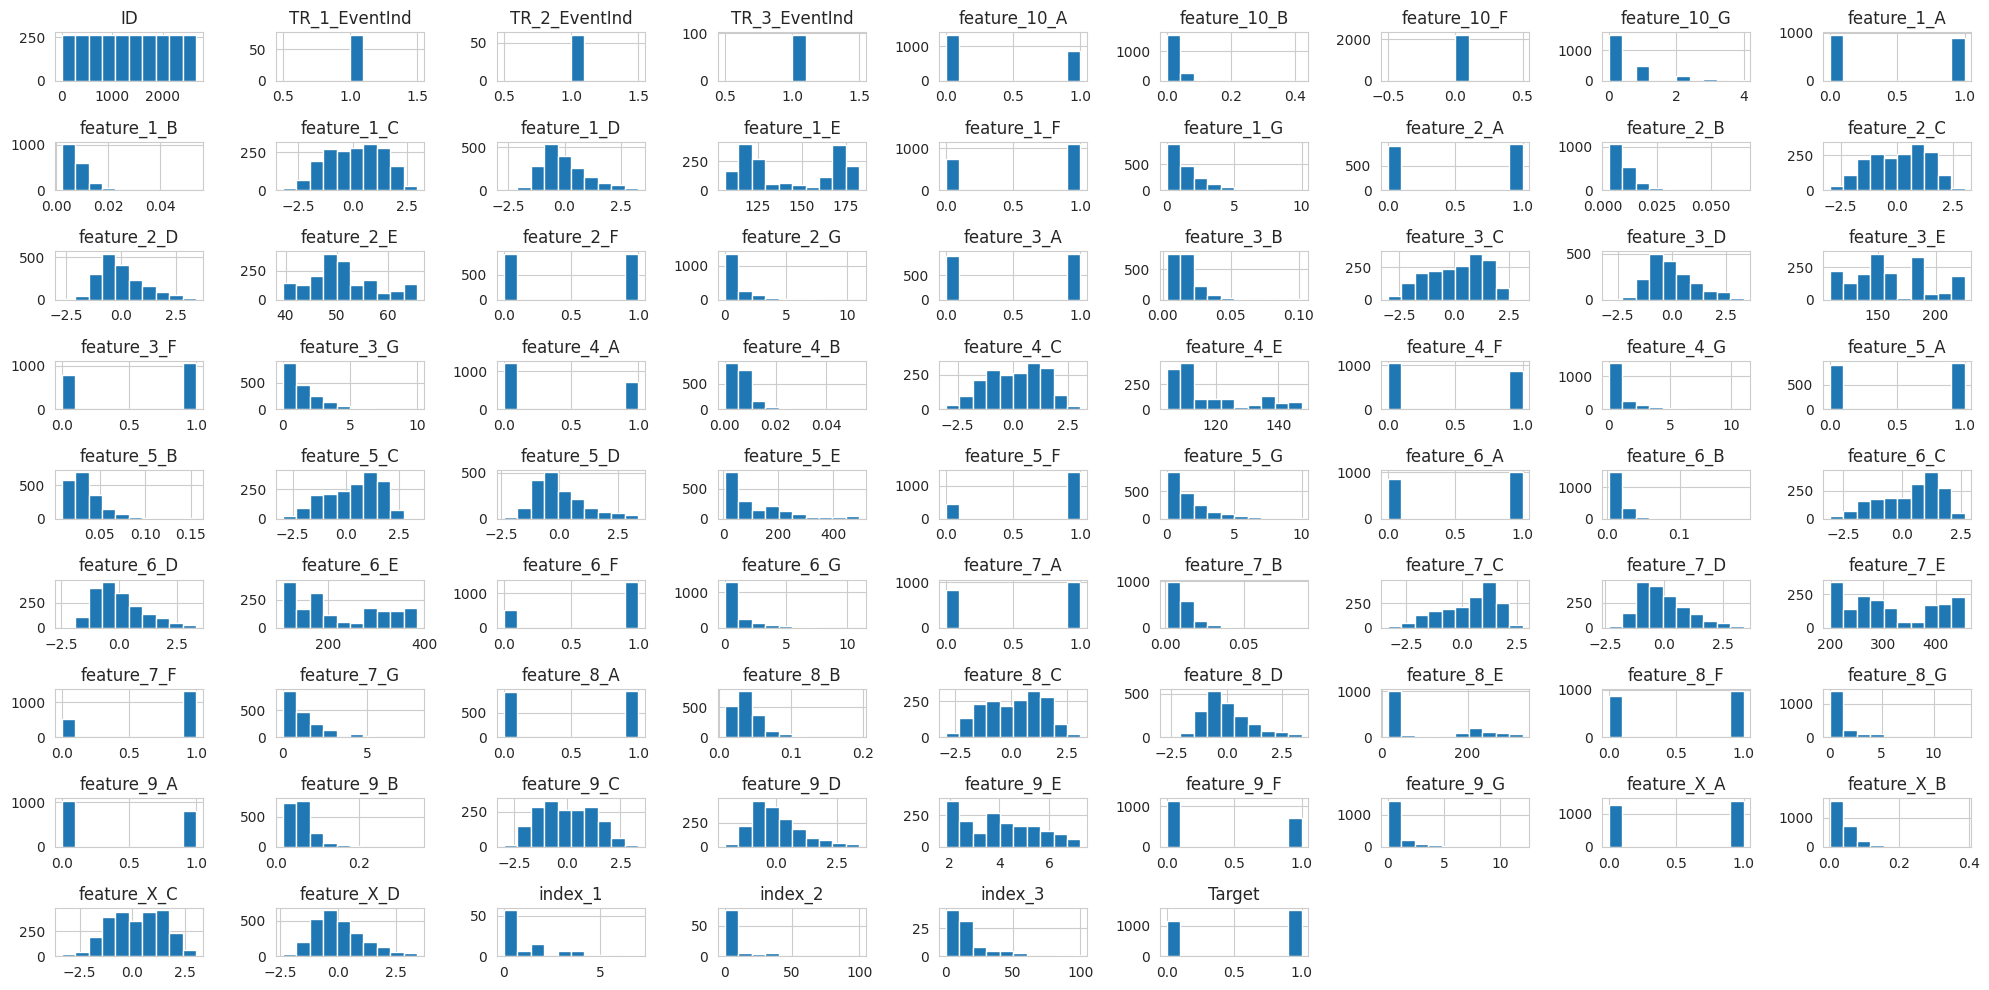

In [ ]:
#histogram
df.hist(figsize=(20,10)) # you can add figsize=(10,10) to resize the figures
plt.tight_layout()
plt.show()

- Features TR_1_EventInd, TR_2_EventInd, TR_3_EventInd, Feature_10_F do not have any variation. They either have 0s or 1s throughout and do not xontribute to the prediction of the target varibable.
- Features index_1, index_2, index_3 maximum of 97 records, contributing to only 3% of the total rows, and the rest of the entries are null. Hence, these features have negligible contribution towards the prediction of our target variable.

In [ ]:
## Creating hold out data set

df_train = df.iloc[:-400]
df_test = df.iloc[-400:]

print("Training data set shape:", df_train.shape)
print("Testing data set shape:",df_test.shape)

Training data set shape: (2260, 78)
Testing data set shape: (400, 78)


In [ ]:
# Checking if df_train's last row and df_test's first row are different

df_train.tail(n=1)


,ID,TR_1_EventInd,TR_2_EventInd,TR_3_EventInd,feature_10_A,feature_10_B,feature_10_F,feature_10_G,feature_1_A,feature_1_B,...,feature_9_F,feature_9_G,feature_X_A,feature_X_B,feature_X_C,feature_X_D,index_1,index_2,index_3,Target
2259,2260,NaN,NaN,NaN,0.0,0.032,0.0,0.0,1.0,0.005,...,0.0,1.0,1,0.01,-0.64314,-0.575943,NaN,NaN,NaN,0


In [ ]:
df_test.head(n=1)

,ID,TR_1_EventInd,TR_2_EventInd,TR_3_EventInd,feature_10_A,feature_10_B,feature_10_F,feature_10_G,feature_1_A,feature_1_B,...,feature_9_F,feature_9_G,feature_X_A,feature_X_B,feature_X_C,feature_X_D,index_1,index_2,index_3,Target
2260,2261,NaN,NaN,NaN,0.0,0.044,0.0,0.0,1.0,0.006,...,1.0,1.0,1,0.042,1.03621,-0.227726,NaN,NaN,NaN,0


In [ ]:
df_train['Target'].value_counts()


Target
1    1285
0     975
Name: count, dtype: int64

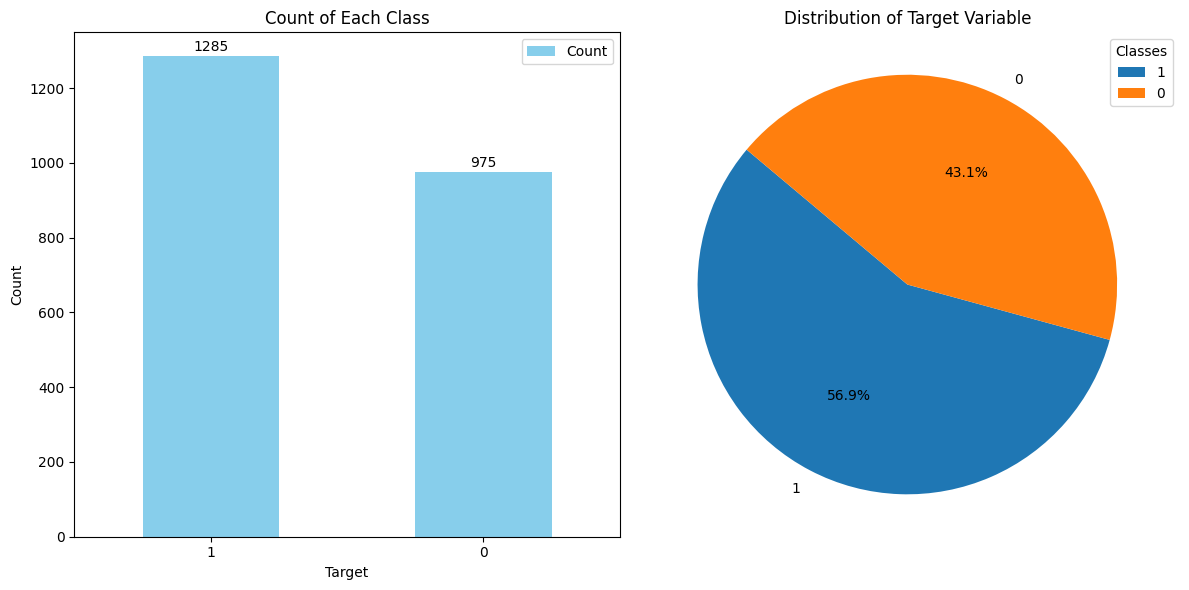

In [ ]:
# Calculate the count of each class in the target variable
class_counts = df_train['Target'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Count graph
class_counts.plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Count of Each Class')
axs[0].set_ylabel('Count')
axs[0].set_xlabel('Target')
axs[0].set_xticklabels(class_counts.index, rotation=0)

# Pie chart
axs[1].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Distribution of Target Variable')
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add count values on top of each bar
for i, count in enumerate(class_counts):
    axs[0].text(i, count + 5, str(count), ha='center', va='bottom')

# Add legends
axs[1].legend(title='Classes', loc='upper right')
axs[0].legend(['Count'], loc='upper right')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
df_train.isna().sum().sum()

59022

In [ ]:
# Imputing the Nans with 0s
tmp = df_train.copy()
tmp.fillna(0, inplace=True)

In [ ]:
# Imputing the Nans with 0s
tmp1 = df_test.copy()
tmp1.fillna(0, inplace=True)

In [ ]:
# Imputing the Nans with median value

tmp = df_train.copy()
# Fill NaN values with the median of each column
tmp.fillna(tmp.median(), inplace=True)

tmp1 = df_test.copy()
# Fill NaN values with the median of each column
tmp1.fillna(tmp.median(), inplace=True)

In [ ]:
tmp.isna().sum().sum()

0

In [ ]:
tmp2 = tmp.copy()
print(tmp2.shape)
tmp2 = tmp2.drop(columns=column_todrop)
print(tmp2.shape)
tmp3 = tmp1.copy()
print(tmp3.shape)
tmp3 = tmp3.drop(columns=column_todrop)
print(tmp3.shape)


(2260, 78)
(2260, 72)
(400, 78)
(400, 72)


In [ ]:
print(tmp2.columns)
print(tmp3.columns)

Index(['ID', 'feature_10_A', 'feature_10_B', 'feature_10_F', 'feature_10_G',
       'feature_1_A', 'feature_1_B', 'feature_1_C', 'feature_1_D',
       'feature_1_E', 'feature_1_F', 'feature_1_G', 'feature_2_A',
       'feature_2_B', 'feature_2_C', 'feature_2_D', 'feature_2_E',
       'feature_2_F', 'feature_2_G', 'feature_3_A', 'feature_3_B',
       'feature_3_C', 'feature_3_D', 'feature_3_E', 'feature_3_F',
       'feature_3_G', 'feature_4_A', 'feature_4_B', 'feature_4_C',
       'feature_4_E', 'feature_4_F', 'feature_4_G', 'feature_5_A',
       'feature_5_B', 'feature_5_C', 'feature_5_D', 'feature_5_E',
       'feature_5_F', 'feature_5_G', 'feature_6_A', 'feature_6_B',
       'feature_6_C', 'feature_6_D', 'feature_6_E', 'feature_6_F',
       'feature_6_G', 'feature_7_A', 'feature_7_B', 'feature_7_C',
       'feature_7_D', 'feature_7_E', 'feature_7_F', 'feature_7_G',
       'feature_8_A', 'feature_8_B', 'feature_8_C', 'feature_8_D',
       'feature_8_E', 'feature_8_F', 'feature_8_G', 

# Random Forest

In [ ]:
# Split the data into features (X) and target variable (y)
X = tmp.drop(['ID', 'Target'], axis=1)
y = tmp['Target']

X_train = X
y_train = y
X_test = tmp1.drop(['ID', 'Target'], axis=1)
y_test = tmp1['Target']

# Setting random seed
rng = np.random.RandomState(999)
indices_train = rng.permutation(len(X_train))
indices_test = rng.permutation(len(X_test))

# Use the shuffled indices to shuffle the data
X_train = X_train.iloc[indices_train]
y_train = y_train.iloc[indices_train]
X_test = X_test.iloc[indices_test]
y_test = y_test.iloc[indices_test]

# Minmax scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest classifier
RF = RandomForestClassifier(n_estimators=100, random_state=999)

# Train the Random Forest classifier
RF.fit(X_train, y_train)

# Make predictions on the test set
y_pred = RF.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[111  64]
 [ 44 181]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.63      0.67       175
           1       0.74      0.80      0.77       225

    accuracy                           0.73       400
   macro avg       0.73      0.72      0.72       400
weighted avg       0.73      0.73      0.73       400



In [ ]:
# Split the data into features (X) and target variable (y)
X = tmp2.drop(['ID', 'Target'], axis=1)
y = tmp2['Target']

X_train = X
y_train = y
X_test = tmp3.drop(['ID', 'Target'], axis=1)
y_test = tmp3['Target']

# Setting random seed
rng = np.random.RandomState(999)
indices_train = rng.permutation(len(X_train))
indices_test = rng.permutation(len(X_test))

# Use the shuffled indices to shuffle the data
X_train = X_train.iloc[indices_train]
y_train = y_train.iloc[indices_train]
X_test = X_test.iloc[indices_test]
y_test = y_test.iloc[indices_test]

# Minmax scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest classifier
RF = RandomForestClassifier(n_estimators=100, random_state=999)

# Train the Random Forest classifier
RF.fit(X_train, y_train)

# Make predictions on the test set
y_pred = RF.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[118  57]
 [ 44 181]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       175
           1       0.76      0.80      0.78       225

    accuracy                           0.75       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.75      0.75      0.75       400



## Accuracy 75%

In [ ]:
X_columns = tmp1.drop(['ID','Target'], axis=1).columns

In [ ]:
X_columns

Index(['TR_1_EventInd', 'TR_2_EventInd', 'TR_3_EventInd', 'feature_10_A',
       'feature_10_B', 'feature_10_F', 'feature_10_G', 'feature_1_A',
       'feature_1_B', 'feature_1_C', 'feature_1_D', 'feature_1_E',
       'feature_1_F', 'feature_1_G', 'feature_2_A', 'feature_2_B',
       'feature_2_C', 'feature_2_D', 'feature_2_E', 'feature_2_F',
       'feature_2_G', 'feature_3_A', 'feature_3_B', 'feature_3_C',
       'feature_3_D', 'feature_3_E', 'feature_3_F', 'feature_3_G',
       'feature_4_A', 'feature_4_B', 'feature_4_C', 'feature_4_E',
       'feature_4_F', 'feature_4_G', 'feature_5_A', 'feature_5_B',
       'feature_5_C', 'feature_5_D', 'feature_5_E', 'feature_5_F',
       'feature_5_G', 'feature_6_A', 'feature_6_B', 'feature_6_C',
       'feature_6_D', 'feature_6_E', 'feature_6_F', 'feature_6_G',
       'feature_7_A', 'feature_7_B', 'feature_7_C', 'feature_7_D',
       'feature_7_E', 'feature_7_F', 'feature_7_G', 'feature_8_A',
       'feature_8_B', 'feature_8_C', 'feature_8_D', 

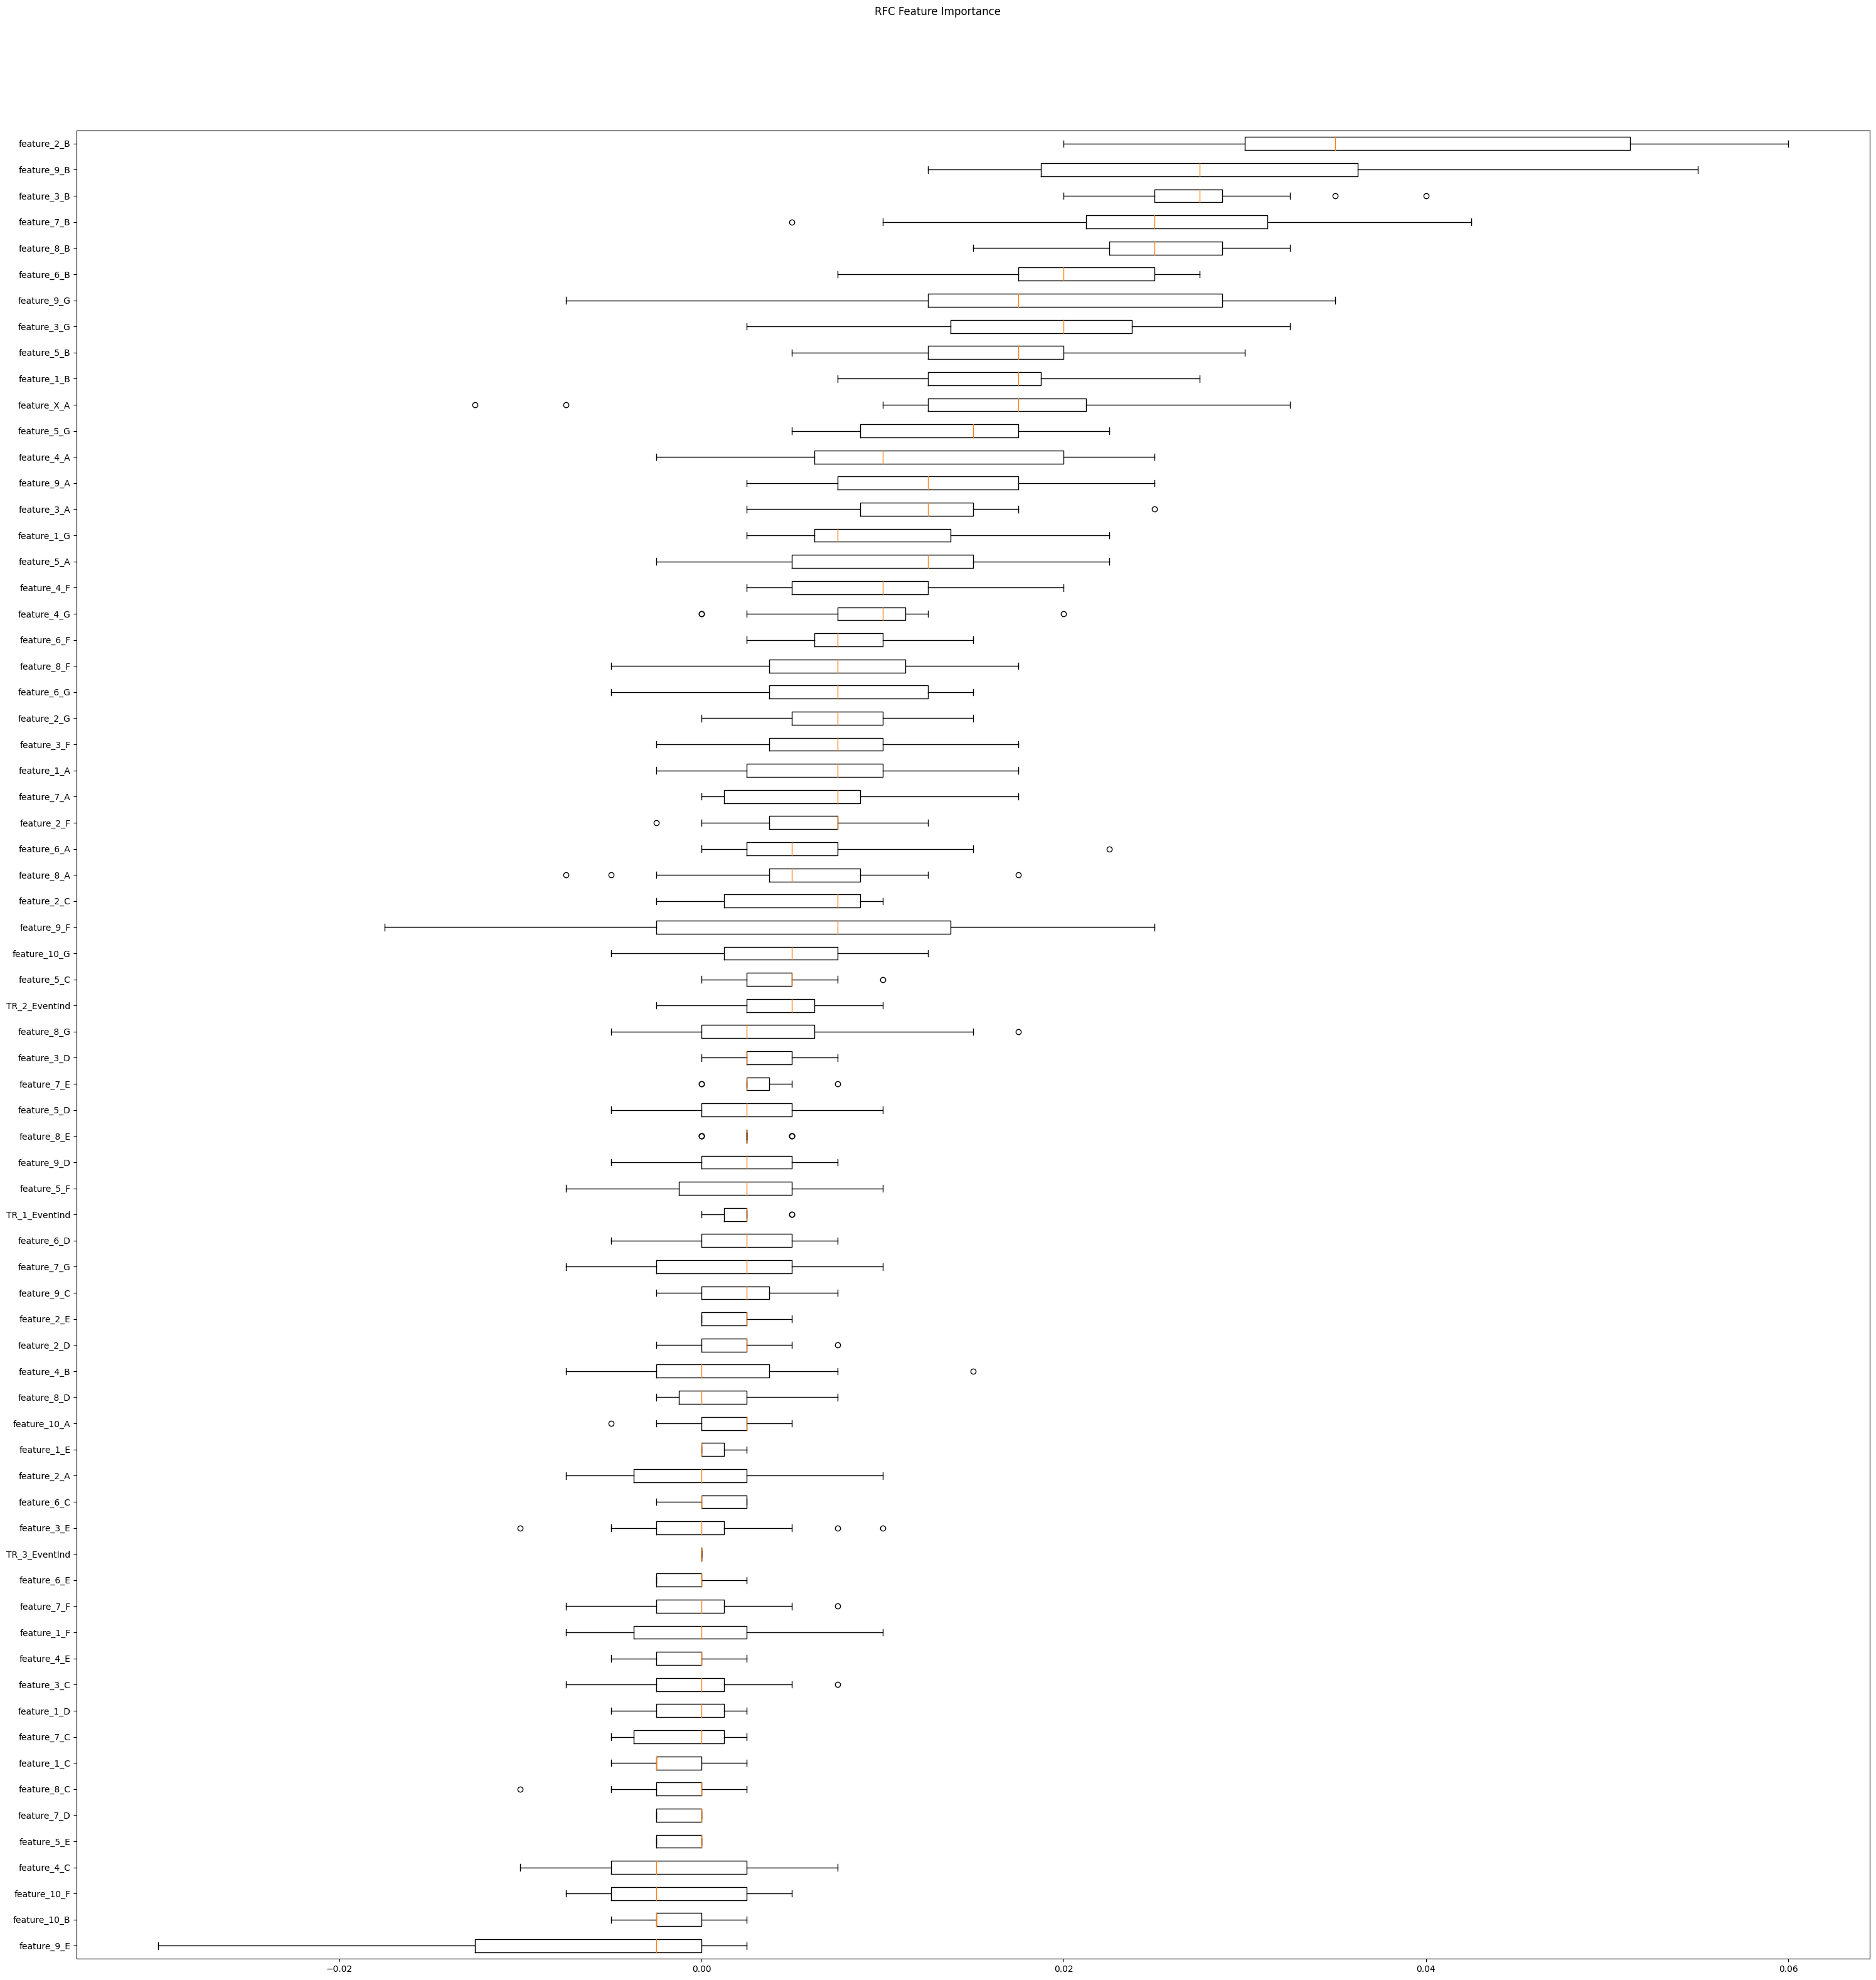

In [ ]:
clf = RF

result = permutation_importance(clf, X_test, y_test, n_repeats=15,
                                random_state=999)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, ax1 = plt.subplots(1, 1, figsize=(30,30))
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_columns[perm_sorted_idx])
fig.suptitle('RFC Feature Importance', y=1.05)
fig.tight_layout()
plt.show()

# Decision Tree

In [ ]:
# Split the data into features (X) and target variable (y)
X = tmp2.drop(['ID', 'Target'], axis=1)
y = tmp2['Target']

X_train = X
y_train = y
X_test = tmp3.drop(['ID', 'Target'], axis=1)
y_test = tmp3['Target']

# Setting random seed
rng = np.random.RandomState(999)
indices_train = rng.permutation(len(X_train))
indices_test = rng.permutation(len(X_test))

# Use the shuffled indices to shuffle the data
X_train = X_train.iloc[indices_train]
y_train = y_train.iloc[indices_train]
X_test = X_test.iloc[indices_test]
y_test = y_test.iloc[indices_test]

# Minmax scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Decision Tree classifier
DT = DecisionTreeClassifier(random_state=999)

# Train the Decision Tree classifier
DT.fit(X_train, y_train)

# Make predictions on the test set
y_pred = DT.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[116  59]
 [ 71 154]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       175
           1       0.72      0.68      0.70       225

    accuracy                           0.68       400
   macro avg       0.67      0.67      0.67       400
weighted avg       0.68      0.68      0.68       400



## Accuracy 68%

# Lostic Regression

In [ ]:
# Split the data into features (X) and target variable (y)
X = tmp2.drop(['ID', 'Target'], axis=1)
y = tmp2['Target']

X_train = X
y_train = y
X_test = tmp3.drop(['ID', 'Target'], axis=1)
y_test = tmp3['Target']

# Setting random seed
rng = np.random.RandomState(999)
indices_train = rng.permutation(len(X_train))
indices_test = rng.permutation(len(X_test))

# Use the shuffled indices to shuffle the data
X_train = X_train.iloc[indices_train]
y_train = y_train.iloc[indices_train]
X_test = X_test.iloc[indices_test]
y_test = y_test.iloc[indices_test]

# Minmax scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Logistic Regression classifier
LR = LogisticRegression(random_state=999)

# Train the Logistic Regression classifier
LR.fit(X_train, y_train)

# Make predictions on the test set
y_pred = LR.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 49 126]
 [ 37 188]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.28      0.38       175
           1       0.60      0.84      0.70       225

    accuracy                           0.59       400
   macro avg       0.58      0.56      0.54       400
weighted avg       0.59      0.59      0.56       400



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Accuracy 59%

# Gradient Boosting Classifier

In [ ]:
# Split the data into features (X) and target variable (y)
X = tmp2.drop(['ID', 'Target'], axis=1)
y = tmp2['Target']

X_train = X
y_train = y
X_test = tmp3.drop(['ID', 'Target'], axis=1)
y_test = tmp3['Target']

# Setting random seed
rng = np.random.RandomState(999)
indices_train = rng.permutation(len(X_train))
indices_test = rng.permutation(len(X_test))

# Use the shuffled indices to shuffle the data
X_train = X_train.iloc[indices_train]
y_train = y_train.iloc[indices_train]
X_test = X_test.iloc[indices_test]
y_test = y_test.iloc[indices_test]

# Minmax scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Gradient Boosting classifier
GBM = GradientBoostingClassifier(n_estimators=100, random_state=999)

# Train the Gradient Boosting classifier
GBM.fit(X_train, y_train)

# Make predictions on the test set
y_pred = GBM.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 93  82]
 [ 29 196]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.53      0.63       175
           1       0.71      0.87      0.78       225

    accuracy                           0.72       400
   macro avg       0.73      0.70      0.70       400
weighted avg       0.73      0.72      0.71       400



## Accuracy 72%

# Support Vector Machine

In [ ]:
# Split the data into features (X) and target variable (y)
X = tmp2.drop(['ID', 'Target'], axis=1)
y = tmp2['Target']

X_train = X
y_train = y
X_test = tmp3.drop(['ID', 'Target'], axis=1)
y_test = tmp3['Target']

# Setting random seed
rng = np.random.RandomState(999)
indices_train = rng.permutation(len(X_train))
indices_test = rng.permutation(len(X_test))

# Use the shuffled indices to shuffle the data
X_train = X_train.iloc[indices_train]
y_train = y_train.iloc[indices_train]
X_test = X_test.iloc[indices_test]
y_test = y_test.iloc[indices_test]

# Minmax scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Support Vector Machine classifier
svm_classifier = SVC(kernel='rbf', random_state=999)

# Train the Support Vector Machine classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 45 130]
 [ 25 200]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.26      0.37       175
           1       0.61      0.89      0.72       225

    accuracy                           0.61       400
   macro avg       0.62      0.57      0.54       400
weighted avg       0.62      0.61      0.57       400



## Accuracy 61%

# K-Nearest Neighbors

In [ ]:
# Split the data into features (X) and target variable (y)
X = tmp2.drop(['ID', 'Target'], axis=1)
y = tmp2['Target']

X_train = X
y_train = y
X_test = tmp3.drop(['ID', 'Target'], axis=1)
y_test = tmp3['Target']

# Setting random seed
rng = np.random.RandomState(999)
indices_train = rng.permutation(len(X_train))
indices_test = rng.permutation(len(X_test))

# Use the shuffled indices to shuffle the data
X_train = X_train.iloc[indices_train]
y_train = y_train.iloc[indices_train]
X_test = X_test.iloc[indices_test]
y_test = y_test.iloc[indices_test]

# Minmax scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the K-Nearest Neighbors classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 83  92]
 [ 68 157]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.47      0.51       175
           1       0.63      0.70      0.66       225

    accuracy                           0.60       400
   macro avg       0.59      0.59      0.59       400
weighted avg       0.60      0.60      0.60       400



## Accuracy 60%

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Split the data into features (X) and target variable (y)
X = tmp2.drop(['ID', 'Target'], axis=1)
y = tmp2['Target']

X_train = X
y_train = y
X_test = tmp3.drop(['ID', 'Target'], axis=1)
y_test = tmp3['Target']

# Setting random seed
rng = np.random.RandomState(999)
indices_train = rng.permutation(len(X_train))
indices_test = rng.permutation(len(X_test))

# Use the shuffled indices to shuffle the data
X_train = X_train.iloc[indices_train]
y_train = y_train.iloc[indices_train]
X_test = X_test.iloc[indices_test]
y_test = y_test.iloc[indices_test]

# Minmax scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Naive Bayes classifier (Gaussian Naive Bayes)
nb_classifier = GaussianNB()

# Train the Naive Bayes classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[120  55]
 [133  92]]

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.69      0.56       175
           1       0.63      0.41      0.49       225

    accuracy                           0.53       400
   macro avg       0.55      0.55      0.53       400
weighted avg       0.56      0.53      0.52       400



## Accuracy 53%

# XG Boost

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier

# Split the data into features (X) and target variable (y)
X = tmp2.drop(['ID', 'Target'], axis=1)
y = tmp2['Target']

X_train = X
y_train = y
X_test = tmp3.drop(['ID', 'Target'], axis=1)
y_test = tmp3['Target']

# Setting random seed
rng = np.random.RandomState(999)
indices_train = rng.permutation(len(X_train))
indices_test = rng.permutation(len(X_test))

# Use the shuffled indices to shuffle the data
X_train = X_train.iloc[indices_train]
y_train = y_train.iloc[indices_train]
X_test = X_test.iloc[indices_test]
y_test = y_test.iloc[indices_test]

# Minmax scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=999)

# Train the XGBoost classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[119  56]
 [ 42 183]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       175
           1       0.77      0.81      0.79       225

    accuracy                           0.76       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.76      0.75       400



## Accuracy 76%

# Light GBM

In [ ]:
pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

# Split the data into features (X) and target variable (y)
X = tmp2.drop(['ID', 'Target'], axis=1)
y = tmp2['Target']

X_train = X
y_train = y
X_test = tmp3.drop(['ID', 'Target'], axis=1)
y_test = tmp3['Target']

# Setting random seed
rng = np.random.RandomState(999)
indices_train = rng.permutation(len(X_train))
indices_test = rng.permutation(len(X_test))

# Use the shuffled indices to shuffle the data
X_train = X_train.iloc[indices_train]
y_train = y_train.iloc[indices_train]
X_test = X_test.iloc[indices_test]
y_test = y_test.iloc[indices_test]

# Minmax scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the LightGBM classifier
lgbm_classifier = LGBMClassifier(random_state=999)

# Train the LightGBM classifier
lgbm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgbm_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 1285, number of negative: 975
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8025
[LightGBM] [Info] Number of data points in the train set: 2260, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.568584 -> initscore=0.276077
[LightGBM] [Info] Start training from score 0.276077
Confusion Matrix:
[[114  61]
 [ 53 172]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.65      0.67       175
           1       0.74      0.76      0.75       225

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400



## Accuracy 71%

In [ ]:
# Split the data into features (X) and target variable (y)
X = tmp2.drop(['ID', 'Target'], axis=1)
y = tmp2['Target']

X_train = X
y_train = y
X_test = tmp3.drop(['ID', 'Target'], axis=1)
y_test = tmp3['Target']

# Initialize SMOTE
smote = SMOTE(random_state=999)

# Perform SMOTE on the training data only
X_train, y_train = smote.fit_resample(X_train, y_train)



y_train.value_counts()

Target
0    1285
1    1285
Name: count, dtype: int64

In [ ]:
pip install imbalanced-learn


In [ ]:
# Setting random seed
rng = np.random.RandomState(999)
indices_train = rng.permutation(len(X_train))
indices_test = rng.permutation(len(X_test))

# Use the shuffled indices to shuffle the data
X_train = X_train.iloc[indices_train]
y_train = y_train.iloc[indices_train]
X_test = X_test.iloc[indices_test]
y_test = y_test.iloc[indices_test]

# Minmax scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the LightGBM classifier
lgbm_classifier = LGBMClassifier(random_state=999)

# Train the LightGBM classifier
lgbm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgbm_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 1285, number of negative: 1285
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9888
[LightGBM] [Info] Number of data points in the train set: 2570, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Confusion Matrix:
[[124  51]
 [ 58 167]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.71      0.69       175
           1       0.77      0.74      0.75       225

    accuracy                           0.73       400
   macro avg       0.72      0.73      0.72       400
weighted avg       0.73      0.73      0.73       400



In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Split the data into features (X) and target variable (y)
X = tmp2.drop(['ID', 'Target'], axis=1)
y = tmp2['Target']

X_train = X
y_train = y
X_test = tmp3.drop(['ID', 'Target'], axis=1)
y_test = tmp3['Target']

y_train.value_counts()
# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=999)

# Perform random oversampling on the training data only
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train, y_train)

# Setting random seed
rng = np.random.RandomState(999)
indices_train = rng.permutation(len(X_train))
indices_test = rng.permutation(len(X_test))

# Use the shuffled indices to shuffle the data
X_train = X_train.iloc[indices_train]
y_train = y_train.iloc[indices_train]
X_test = X_test.iloc[indices_test]
y_test = y_test.iloc[indices_test]

# Minmax scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the LightGBM classifier
lgbm_classifier = LGBMClassifier(random_state=999)

# Train the LightGBM classifier
lgbm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgbm_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 1285, number of negative: 975
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8025
[LightGBM] [Info] Number of data points in the train set: 2260, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.568584 -> initscore=0.276077
[LightGBM] [Info] Start training from score 0.276077
Confusion Matrix:
[[114  61]
 [ 53 172]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.65      0.67       175
           1       0.74      0.76      0.75       225

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400



# Smoting produces worse results and over sampling produce similar results. Our data is fairly equally split already, so we are not going to perform over sampling or smoting

# Cat Boosting

In [ ]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 3.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

# Split the data into features (X) and target variable (y)
X = tmp2.drop(['ID', 'Target'], axis=1)
y = tmp2['Target']

X_train = X
y_train = y
X_test = tmp3.drop(['ID', 'Target'], axis=1)
y_test = tmp3['Target']

# Setting random seed
rng = np.random.RandomState(999)
indices_train = rng.permutation(len(X_train))
indices_test = rng.permutation(len(X_test))

# Use the shuffled indices to shuffle the data
X_train = X_train.iloc[indices_train]
y_train = y_train.iloc[indices_train]
X_test = X_test.iloc[indices_test]
y_test = y_test.iloc[indices_test]

# Minmax scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the CatBoost classifier
catboost_classifier = CatBoostClassifier(random_state=999)

# Train the CatBoost classifier
catboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = catboost_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Learning rate set to 0.014593
0:	learn: 0.6918281	total: 79.7ms	remaining: 1m 19s
1:	learn: 0.6893847	total: 102ms	remaining: 50.9s
2:	learn: 0.6880036	total: 124ms	remaining: 41.2s
3:	learn: 0.6867584	total: 144ms	remaining: 35.9s
4:	learn: 0.6851942	total: 163ms	remaining: 32.5s
5:	learn: 0.6839977	total: 181ms	remaining: 30s
6:	learn: 0.6823642	total: 205ms	remaining: 29s
7:	learn: 0.6808616	total: 225ms	remaining: 27.9s
8:	learn: 0.6797127	total: 242ms	remaining: 26.7s
9:	learn: 0.6786570	total: 269ms	remaining: 26.7s
10:	learn: 0.6773710	total: 296ms	remaining: 26.6s
11:	learn: 0.6761735	total: 316ms	remaining: 26s
12:	learn: 0.6749254	total: 338ms	remaining: 25.7s
13:	learn: 0.6737191	total: 356ms	remaining: 25.1s
14:	learn: 0.6726938	total: 376ms	remaining: 24.7s
15:	learn: 0.6714680	total: 396ms	remaining: 24.4s
16:	learn: 0.6703934	total: 423ms	remaining: 24.4s
17:	learn: 0.6690968	total: 445ms	remaining: 24.3s
18:	learn: 0.6684528	total: 468ms	remaining: 24.2s
19:	learn: 0.66

## Accuracy 71%

# Rough

In [ ]:
# List of words
words = [
    "feature_8_G", "feature_3_D", "feature_7_E", "feature_5_D", "feature_8_E",
    "feature_9_D", "feature_5_F", "feature_6_D", "feature_7_G",
    "feature_9_C", "feature_2_E", "feature_2_D", "feature_4_B", "feature_8_D",
    "feature_10_A", "feature_1_E", "feature_2_A", "feature_6_C", "feature_3_E",
    "feature_6_E", "feature_7_F", "feature_1_F", "feature_4_E",
    "feature_3_C", "feature_1_D", "feature_7_C", "feature_1_C", "feature_8_C",
    "feature_7_D", "feature_5_E", "feature_4_C", "feature_10_F", "feature_10_B",
    "feature_9_E"
]

# Convert the list of words to a Python list
featurestodrop = list(words)

In [ ]:
from xgboost import XGBClassifier

# Split the data into features (X) and target variable (y)
X = tmp2.drop(['ID', 'Target'], axis=1)
X = X.drop(featurestodrop, axis=1)
y = tmp2['Target']

X_train = X
y_train = y
X_test = tmp3.drop(['ID', 'Target'], axis=1)
X_test = X_test.drop(featurestodrop, axis=1)
y_test = tmp3['Target']

# Setting random seed
rng = np.random.RandomState(999)
indices_train = rng.permutation(len(X_train))
indices_test = rng.permutation(len(X_test))

# Use the shuffled indices to shuffle the data
X_train = X_train.iloc[indices_train]
y_train = y_train.iloc[indices_train]
X_test = X_test.iloc[indices_test]
y_test = y_test.iloc[indices_test]

# Minmax scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=999)

# Train the XGBoost classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 85  90]
 [ 62 163]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.49      0.53       175
           1       0.64      0.72      0.68       225

    accuracy                           0.62       400
   macro avg       0.61      0.61      0.60       400
weighted avg       0.62      0.62      0.61       400



In [ ]:
# Split the data into features (X) and target variable (y)
X = tmp2.drop(['ID', 'Target'], axis=1)
X = X.drop(featurestodrop, axis=1)

y = tmp2['Target']

X_train = X
y_train = y
X_test = tmp3.drop(['ID', 'Target'], axis=1)
X_test = X_test.drop(featurestodrop, axis=1)
y_test = tmp3['Target']

# Setting random seed
rng = np.random.RandomState(999)
indices_train = rng.permutation(len(X_train))
indices_test = rng.permutation(len(X_test))

# Use the shuffled indices to shuffle the data
X_train = X_train.iloc[indices_train]
y_train = y_train.iloc[indices_train]
X_test = X_test.iloc[indices_test]
y_test = y_test.iloc[indices_test]

# Minmax scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest classifier
RF = RandomForestClassifier(n_estimators=100, random_state=999)

# Train the Random Forest classifier
RF.fit(X_train, y_train)

# Make predictions on the test set
y_pred = RF.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[110  65]
 [ 45 180]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.63      0.67       175
           1       0.73      0.80      0.77       225

    accuracy                           0.73       400
   macro avg       0.72      0.71      0.72       400
weighted avg       0.72      0.72      0.72       400

